In [1]:
# Import the dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs


In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

612

In [5]:
# Import the requests library
import requests

# Import the API key
from config import weather_api_key

In [6]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [7]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [8]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging
print("Beginning Data Retrieval")
print("------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list
for i , city in enumerate(cities):
    
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)
        
    # Creat endpoint URL with each city
    city_url = url + "&q=" + city.replace(" ", "+")
    
    # Log the URL, reccord, and set numbers and the city
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
         # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval
------------------------
Processing Record 1 of Set 1 | katsuura
Processing Record 2 of Set 1 | mandalgovi
Processing Record 3 of Set 1 | kazalinsk
City not found. Skipping...
Processing Record 4 of Set 1 | pevek
Processing Record 5 of Set 1 | hermanus
Processing Record 6 of Set 1 | amderma
City not found. Skipping...
Processing Record 7 of Set 1 | haines junction
Processing Record 8 of Set 1 | hobart
Processing Record 9 of Set 1 | ponta do sol
Processing Record 10 of Set 1 | quelimane
Processing Record 11 of Set 1 | yellowknife
Processing Record 12 of Set 1 | tasiilaq
Processing Record 13 of Set 1 | new norfolk
Processing Record 14 of Set 1 | namatanai
Processing Record 15 of Set 1 | puerto ayora
Processing Record 16 of Set 1 | qaanaaq
Processing Record 17 of Set 1 | shelburne
Processing Record 18 of Set 1 | havre-saint-pierre
Processing Record 19 of Set 1 | atuona
Processing Record 20 of Set 1 | saint-augustin
Processing Record 21 of Set 1 | talnakh
Processin

Processing Record 39 of Set 4 | bakchar
Processing Record 40 of Set 4 | mecca
Processing Record 41 of Set 4 | zhezkazgan
Processing Record 42 of Set 4 | khatanga
Processing Record 43 of Set 4 | sambava
Processing Record 44 of Set 4 | tessalit
Processing Record 45 of Set 4 | beyneu
Processing Record 46 of Set 4 | atambua
Processing Record 47 of Set 4 | show low
Processing Record 48 of Set 4 | saint anthony
Processing Record 49 of Set 4 | lodja
Processing Record 50 of Set 4 | ahipara
Processing Record 1 of Set 5 | soyo
Processing Record 2 of Set 5 | bud
Processing Record 3 of Set 5 | la macarena
Processing Record 4 of Set 5 | viligili
City not found. Skipping...
Processing Record 5 of Set 5 | leningradskiy
Processing Record 6 of Set 5 | gorom-gorom
Processing Record 7 of Set 5 | marcona
City not found. Skipping...
Processing Record 8 of Set 5 | castro
Processing Record 9 of Set 5 | talaya
Processing Record 10 of Set 5 | port alfred
Processing Record 11 of Set 5 | sentyabrskiy
City not fo

Processing Record 27 of Set 8 | chunskiy
Processing Record 28 of Set 8 | omboue
Processing Record 29 of Set 8 | the valley
Processing Record 30 of Set 8 | guerrero negro
Processing Record 31 of Set 8 | toora-khem
Processing Record 32 of Set 8 | huinan
Processing Record 33 of Set 8 | broome
Processing Record 34 of Set 8 | half moon bay
Processing Record 35 of Set 8 | katherine
Processing Record 36 of Set 8 | esperance
Processing Record 37 of Set 8 | ondorhaan
City not found. Skipping...
Processing Record 38 of Set 8 | hidrolandia
Processing Record 39 of Set 8 | north platte
Processing Record 40 of Set 8 | comodoro rivadavia
Processing Record 41 of Set 8 | naron
Processing Record 42 of Set 8 | gamba
Processing Record 43 of Set 8 | garissa
Processing Record 44 of Set 8 | trapani
Processing Record 45 of Set 8 | dabakala
Processing Record 46 of Set 8 | morondava
Processing Record 47 of Set 8 | umm jarr
City not found. Skipping...
Processing Record 48 of Set 8 | merauke
Processing Record 49 

Processing Record 16 of Set 12 | harper
Processing Record 17 of Set 12 | hashtgerd
Processing Record 18 of Set 12 | sao gabriel da cachoeira
Processing Record 19 of Set 12 | danville
Processing Record 20 of Set 12 | rantepao
Processing Record 21 of Set 12 | karratha
Processing Record 22 of Set 12 | ende
Processing Record 23 of Set 12 | falealupo
City not found. Skipping...
Processing Record 24 of Set 12 | braintree
Processing Record 25 of Set 12 | santa cecilia
Processing Record 26 of Set 12 | aswan
Processing Record 27 of Set 12 | paraiso
Processing Record 28 of Set 12 | bentiu
Processing Record 29 of Set 12 | marsa matruh
Processing Record 30 of Set 12 | shush
Processing Record 31 of Set 12 | sioux lookout
Processing Record 32 of Set 12 | panaba
Processing Record 33 of Set 12 | vila
Processing Record 34 of Set 12 | veraval
Processing Record 35 of Set 12 | shawnee
Processing Record 36 of Set 12 | montepuez
Processing Record 37 of Set 12 | piacabucu
Processing Record 38 of Set 12 | ngu

In [9]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Katsuura,35.1333,140.3000,39.18,58,100,9.08,JP,2022-01-06 00:02:49
1,Mandalgovi,45.7625,106.2708,10.98,47,0,7.56,MN,2022-01-06 00:02:50
2,Pevek,69.7008,170.3133,-3.60,99,73,2.28,RU,2022-01-06 00:02:50
3,Hermanus,-34.4187,19.2345,64.80,77,66,13.22,ZA,2022-01-06 00:02:50
4,Haines Junction,60.7522,-137.5108,-33.29,100,83,1.01,CA,2022-01-06 00:02:51
5,Hobart,-42.8794,147.3294,63.27,70,100,7.09,AU,2022-01-06 00:02:31
6,Ponta Do Sol,32.6667,-17.1000,62.01,64,6,7.02,PT,2022-01-06 00:02:51
7,Quelimane,-17.8786,36.8883,75.97,94,100,3.76,MZ,2022-01-06 00:02:51
8,Yellowknife,62.4560,-114.3525,-29.58,79,47,4.00,CA,2022-01-06 00:00:07
9,Tasiilaq,65.6145,-37.6368,32.16,93,100,20.29,GL,2022-01-06 00:02:52


In [10]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Katsuura,JP,2022-01-06 00:02:49,35.1333,140.3000,39.18,58,100,9.08
1,Mandalgovi,MN,2022-01-06 00:02:50,45.7625,106.2708,10.98,47,0,7.56
2,Pevek,RU,2022-01-06 00:02:50,69.7008,170.3133,-3.60,99,73,2.28
3,Hermanus,ZA,2022-01-06 00:02:50,-34.4187,19.2345,64.80,77,66,13.22
4,Haines Junction,CA,2022-01-06 00:02:51,60.7522,-137.5108,-33.29,100,83,1.01
5,Hobart,AU,2022-01-06 00:02:31,-42.8794,147.3294,63.27,70,100,7.09
6,Ponta Do Sol,PT,2022-01-06 00:02:51,32.6667,-17.1000,62.01,64,6,7.02
7,Quelimane,MZ,2022-01-06 00:02:51,-17.8786,36.8883,75.97,94,100,3.76
8,Yellowknife,CA,2022-01-06 00:00:07,62.4560,-114.3525,-29.58,79,47,4.00
9,Tasiilaq,GL,2022-01-06 00:02:52,65.6145,-37.6368,32.16,93,100,20.29


In [25]:
# Create the output file (CSV)
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [26]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

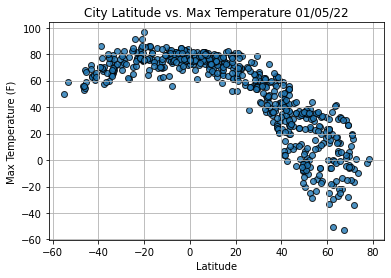

In [27]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

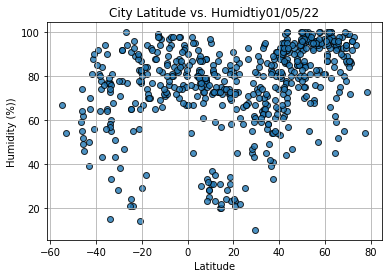

In [28]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidtiy"+ time.strftime("%x"))
plt.ylabel("Humidity (%))")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig2.png")

# Show plot.
plt.show()

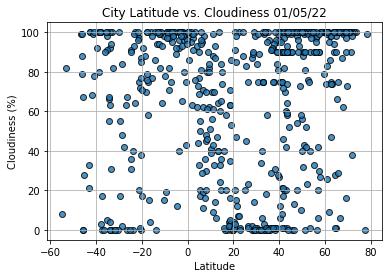

In [29]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig3.png")

# Show plot.
plt.show()

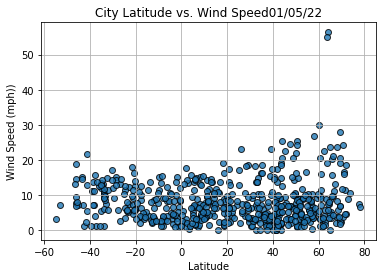

In [30]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed"+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph))")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig4.png")

# Show plot.
plt.show()

In [31]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
    
    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [32]:
index13 = city_data_df.loc[13]
index13

City                      Qaanaaq
Country                        GL
Date          2022-01-06 00:02:53
Lat                        77.484
Lng                      -69.3632
Max Temp                     -2.2
Humidity                       54
Cloudiness                      0
Wind Speed                   7.47
Name: 13, dtype: object

In [33]:
city_data_df["Lat"] >= 0

0       True
1       True
2       True
3      False
4       True
       ...  
558     True
559     True
560     True
561     True
562     True
Name: Lat, Length: 563, dtype: bool

In [34]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Katsuura,JP,2022-01-06 00:02:49,35.1333,140.3000,39.18,58,100,9.08
1,Mandalgovi,MN,2022-01-06 00:02:50,45.7625,106.2708,10.98,47,0,7.56
2,Pevek,RU,2022-01-06 00:02:50,69.7008,170.3133,-3.60,99,73,2.28
4,Haines Junction,CA,2022-01-06 00:02:51,60.7522,-137.5108,-33.29,100,83,1.01
6,Ponta Do Sol,PT,2022-01-06 00:02:51,32.6667,-17.1000,62.01,64,6,7.02


In [35]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

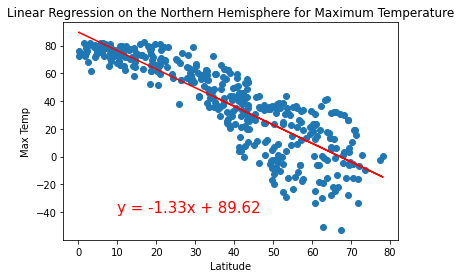

In [36]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for Maximum Temperature', 'Max Temp',(10,-40))

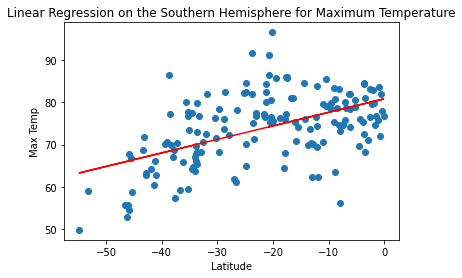

In [37]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for Maximum Temperature', 'Max Temp',(-40,45))

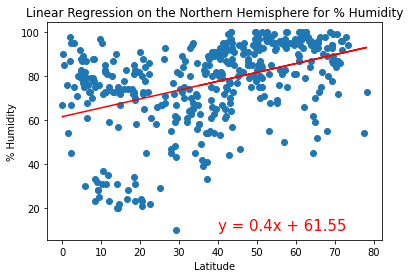

In [38]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for % Humidity', '% Humidity',(40,10))

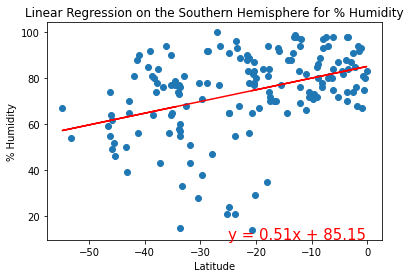

In [39]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for % Humidity', '% Humidity',(-25,10))

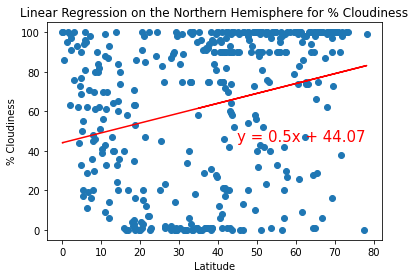

In [40]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for % Cloudiness', '% Cloudiness',(45,45))

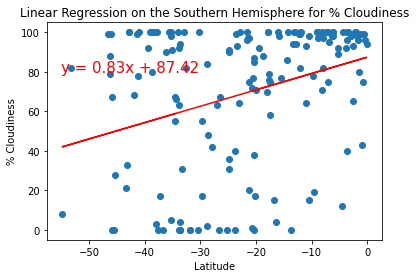

In [41]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for % Cloudiness', '% Cloudiness',(-55,80))

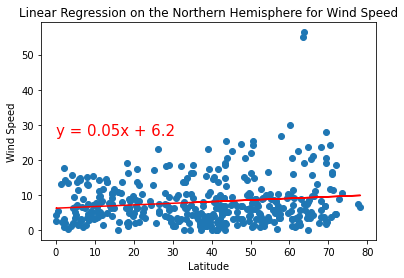

In [42]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for Wind Speed', 'Wind Speed',(0,27))

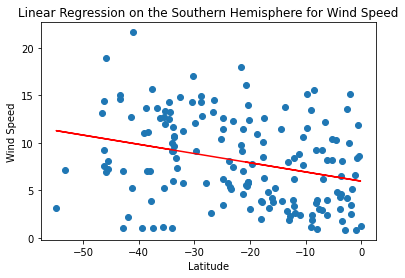

In [43]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for Wind Speed', 'Wind Speed',(-40,30))